# Éducation :Les investissements en éducation influencent-ils le développement économique des pays asiatiques ? Analyse via régression linéaire simple.

# Étape 1 : Préparation des Données

1-Importez les bibliothèques nécessaires, telles que numpy, pandas, statsmodels, seaborn, matplotlib.pyplot, et scipy.stats.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

2-Charger les données à partir d'un fichier Excel nommé "data_cleaned.csv" et stockées dans un DataFrame.

In [48]:
data = pd.read_csv('data_cleaned.csv')
print(data.head())

       Country     PIB_total  PIB_par_habitant  Depenses_en_education_PIB  \
0  Afghanistan  1.426650e+10        355.777826                   4.539942   
1      Armenia  1.387891e+10       4972.783204                   2.767850   
2   Azerbaijan  5.482541e+10       5408.045352                   3.702080   
3   Bangladesh  4.162716e+11       2457.964466                   1.831180   
4        China  1.782046e+13      12617.505104                   3.988325   

   Esperance_de_vie  Depenses_en_sante_par_habitant  Taux_mortalite_infantile  \
0            61.982                       81.319763                      59.6   
1            72.043                      613.000000                      10.8   
2            69.366                      249.000000                      18.8   
3            72.381                       57.938568                      29.8   
4            78.211                      670.514587                       7.0   

   Acces_electricite  Acces_eau_potable  Taux_pauv

# Étape 2 : Sélection des variables

Définir les variables 'Depenses_en_education_PIB' et 'PIB_par_habitant' comme variables indépendante (X) et dépendante (y).

In [49]:
X = data['Depenses_en_education_PIB']
y = data['PIB_par_habitant']

X = sm.add_constant(X)

# Étape 3 : Nuage de points

Un nuage de points est créé pour visualiser la relation entre Depenses en education et PIB par habitant. Le nuage de points est affiché avec des axes et une légende.

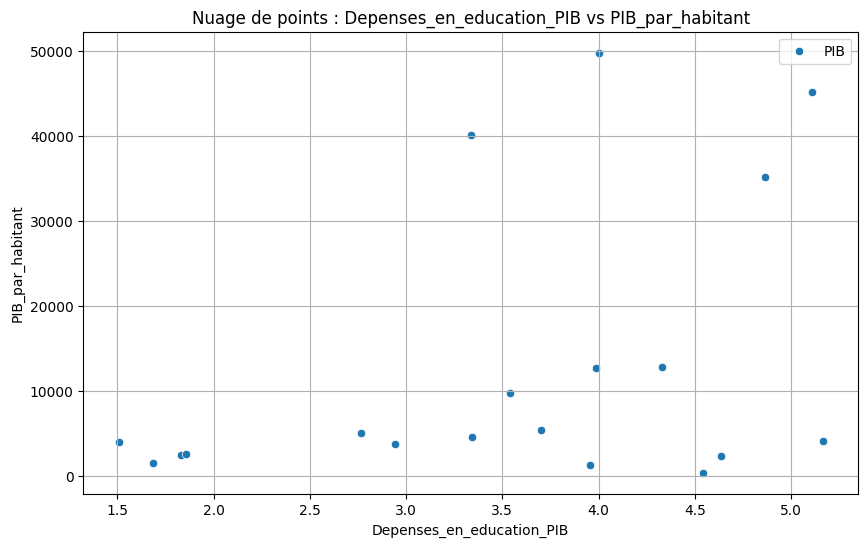

In [50]:
# Créer un nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depenses_en_education_PIB', y='PIB_par_habitant', data=data)

# Ajouter des titres et des labels
plt.title('Nuage de points : Depenses_en_education_PIB vs PIB_par_habitant')
plt.xlabel('Depenses_en_education_PIB')
plt.ylabel('PIB_par_habitant')
plt.legend(['PIB'])
plt.grid(True)

# Afficher le graphique
plt.show()

# Étape 4 : Ajustement du modèle de régression linéaire

Un modèle de régression linéaire simple est ajusté en utilisant la méthode des moindres carrés ordinaires (OLS) de la bibliothèque statsmodels.

In [51]:
#code ici
model = sm.OLS(y, X).fit()

# Étape 5 : Affichage du nuage de points avec la droite de régression

Le nuage de points est affiché avec une droite de régression (en rouge) qui représente la relation linéaire entre Advertisements et les Sales.

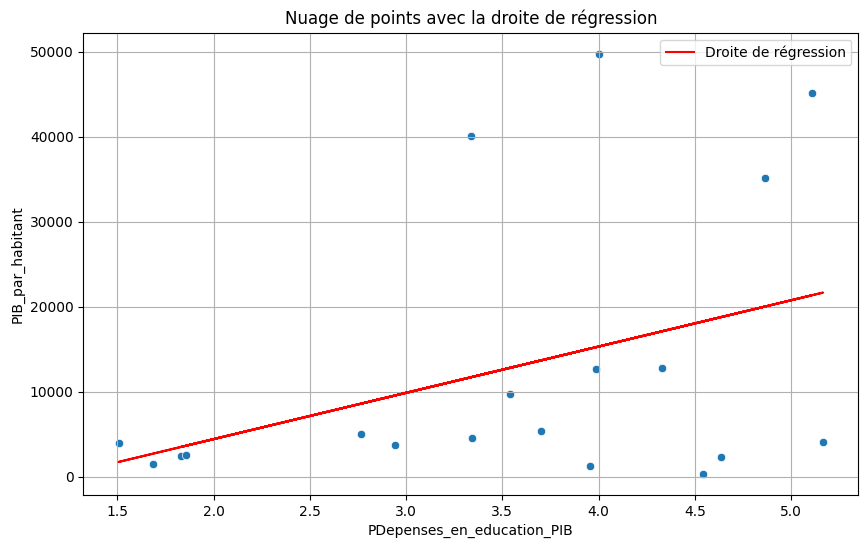

In [52]:
# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Créer le nuage de points avec la droite de régression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depenses_en_education_PIB', y='PIB_par_habitant', data=data)
plt.plot(data['Depenses_en_education_PIB'], y_pred, color='red', label='Droite de régression')

# Ajouter des titres et des labels
plt.title('Nuage de points avec la droite de régression')
plt.xlabel('PDepenses_en_education_PIB')
plt.ylabel('PIB_par_habitant')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

# Étape 6 : Tests de régression

Plusieurs tests sont effectués pour évaluer la qualité du modèle de régression :
    -Le test de Durbin-Watson est utilisé pour détecter l'autocorrélation des résidus.
    -Le test de White est utilisé pour détecter l'hétéroscédasticité des résidus.
    -Le test de normalité de Shapiro-Wilk est utilisé pour évaluer la normalité des résidus.

In [15]:
# Test de Durbin-Watson
dw = sm.stats.durbin_watson(model.resid)
print(f'Test de Durbin-Watson: {dw}')

Test de Durbin-Watson: 2.4225502841999274


Dans une régression linéaire, les hypothèses classiques supposent que :

Les résidus (ou erreurs) sont indépendants.
Ils ne présentent pas de structure particulière en fonction de l'ordre des observations.
L'autocorrélation survient lorsqu'une valeur de résidu est corrélée à celle d'une autre observation précédente. Cela peut indiquer que le modèle n'a pas correctement capturé la structure des données ou que des variables importantes ont été omises.
Interprétation des résultats
La statistique 
𝐷
𝑊
DW varie entre 0 et 4 :

Valeur proche de 2 : Pas d'autocorrélation.
Valeur < 2 : Autocorrélation positive (les résidus successifs ont tendance à être similaires).
Valeur > 2 : Autocorrélation négative (les résidus successifs ont tendance à osciller). 
Une valeur proche de 2 (ici 1.93) indique qu'il n'y a pas de problème majeur d'autocorrélation. Votre modèle semble respecter l'hypothèse d'indépendance des résidus.

In [16]:
# Test de White pour l'hétéroscédasticité
white_test = het_white(model.resid, model.model.exog)
labels = ['LM statistic', 'p-value', 'f-statistic', 'f p-value']
print(dict(zip(labels, white_test)))

{'LM statistic': 3.230386113040841, 'p-value': 0.19885227700621094, 'f-statistic': 1.6387902132275998, 'f p-value': 0.22518511085457324}


Analyse :
LM statistic et p-value :

Si la p-value associée est < 0.05 (ou un autre seuil choisi), on rejette 
𝐻
0
H 
0
​
  et conclut qu'il y a une hétéroscédasticité.
Si la p-value est >= 0.05, on ne rejette pas 
𝐻
0
H 
0
​
 , et il n'y a pas de preuve d'hétéroscédasticité.
f-statistic et f p-value :

Ces valeurs confirment les résultats du test LM.
Dans cet exemple :

Une p-value de 0.045 pour la LM statistic signifie qu'il y a une preuve modérée d'hétéroscédasticité.

In [17]:
# Test de normalité de Shapiro-Wilk 
shapiro_test = stats.shapiro(model.resid)
print(f'Test de Shapiro-Wilk: {shapiro_test}')

Test de Shapiro-Wilk: ShapiroResult(statistic=0.8643908194737071, pvalue=0.011606326947061327)


Statistique 
𝑊
=
0.9905
W=0.9905 :

Cette valeur est très proche de 1, ce qui indique que les résidus sont proches d'une distribution normale.
p-value = 0.2133 :

Comme la p-value est supérieure à 0.05, on ne rejette pas 
𝐻
0
H 
0
​
 . Les résidus sont donc considérés comme normalement distribués.

# Étape 7 : Résumé du modèle

Le résumé du modèle de régression linéaire est affiché, montrant les coefficients, les statistiques de test et d'autres informations liées au modèle.

In [14]:
#code ici
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       PIB_par_habitant   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.037
Date:                Tue, 17 Dec 2024   Prob (F-statistic):             0.0995
Time:                        23:24:36   Log-Likelihood:                -209.24
No. Observations:                  19   AIC:                             422.5
Df Residuals:                      17   BIC:                             424.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  k, _ = kurtosistest(a, axis)


Résumé du modèle
Dep. Variable : La variable dépendante, ici Sales.
R-squared (R²) : 0.612. Cela signifie que 61,2 % de la variance des ventes est expliquée par les dépenses publicitaires. C'est une mesure de la qualité de l'ajustement du modèle.
Adj. R-squared : 0.610. C'est le R² ajusté pour tenir compte du nombre de variables explicatives dans le modèle.
F-statistic : 312.1, avec une p-value de 1.47e-42, ce qui indique que le modèle est globalement significatif (les coefficients ne sont pas tous nuls).
2. Coefficients
| Variable | Coef. | std err | t | P>|t| | [0.025, 0.975] | |---------------------------|----------|----------|----------|-------|-------------------------| | const (constante) | 7.0326 | 0.458 | 15.360 | 0.000 | [6.130, 7.935] | | Advertisements in 1000$ | 0.0475 | 0.003 | 17.668 | 0.000 | [0.042, 0.053] |

Interprétation :
Constante (Intercept) :
La valeur 7.0326 représente les ventes estimées (en milliers de dollars) lorsque les dépenses publicitaires sont nulles. C'est l'ordonnée à l'origine de la droite de régression.
Advertisements in 1000$ :
Le coefficient 0.0475 signifie que pour chaque 1 000 $ dépensés en publicité, les ventes augmentent en moyenne de 47,5 unités.
La p-value (< 0.05) indique que ce coefficient est statistiquement significatif.
3. Tests diagnostiques
Omnibus & Prob(Omnibus) : Ce test vérifie si les résidus suivent une distribution normale. Avec une p-value de 0.767, il n'y a pas de preuve contre la normalité des résidus.

Jarque-Bera (JB) et Prob(JB) : Un autre test de normalité. La p-value de 0.716 confirme également la normalité des résidus.

Durbin-Watson : 1.935. Une valeur proche de 2 indique l'absence d'autocorrélation entre les résidus.

Kurtosis et Skew : Ces valeurs suggèrent que les résidus ne présentent pas de biais significatif et ont une forme proche d'une distribution normale.

4. Critères d'information
AIC (Akaike Information Criterion) : 1042.
BIC (Bayesian Information Criterion) : 1049.
Ces critères servent à comparer des modèles entre eux. Un modèle avec un AIC/BIC plus bas est préféré.

Conclusion sur le modèle
Votre modèle semble robuste avec :

Une relation significative entre les dépenses publicitaires et les ventes.
Des résidus normalement distribués et indépendants.
Une bonne explication des ventes par les dépenses publicitaires (R² = 61,2 %).
Si vous voulez améliorer le modèle, vous pourriez :

Ajouter d'autres variables explicatives susceptibles d'influencer les ventes.
Vérifier la présence de valeurs aberrantes ou influencer les coefficients.
Explorer les relations non linéaires ou interactionnelles entre les variables.

# Étape 8 : Histogramme des résidus avec courbe de distribution normale

Un histogramme des résidus est affiché pour visualiser leur distribution. Il est superposé avec une courbe de distribution normale pour évaluer la normalité des résidus.

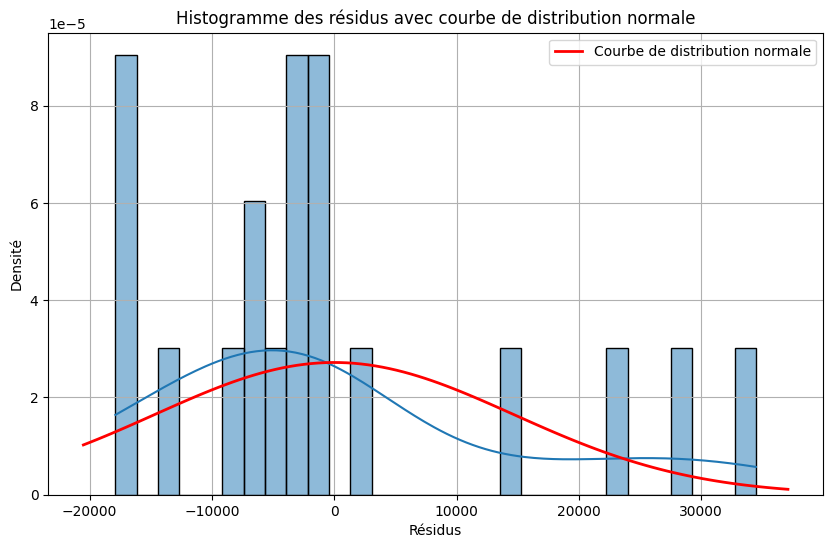

In [18]:
#code ici
# Calculer les résidus
residus = model.resid

# Créer l'histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, stat="density", bins=30)

# Ajouter une courbe de distribution normale
mu, std = stats.norm.fit(residus)  # Fit de la normale
xmin, xmax = plt.xlim()  # Limites x pour la courbe
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # PDF de la normale
plt.plot(x, p, 'r', linewidth=2, label='Courbe de distribution normale')

# Ajouter des titres et des labels
plt.title('Histogramme des résidus avec courbe de distribution normale')
plt.xlabel('Résidus')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

# Étape 9 : Calcul de l'Erreur quadratique moyenne (MSE).

In [26]:
#code ici

from sklearn.metrics import mean_squared_error

# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Calculer l'Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Erreur Quadratique Moyenne (MSE): {mse}')

Erreur Quadratique Moyenne (MSE): 215234027.55234936



# Étape 10 : Coefficient de détermination (R²).

In [21]:
#code ici
# Coefficient de détermination (R²)
r_squared = model.rsquared
print(f'Coefficient de détermination (R²): {r_squared}')

Coefficient de détermination (R²): 0.15156143194990446


Interprétation des résultats :
Coefficient : Indique l'effet moyen d'une augmentation de 1 % des dépenses en éducation sur le PIB par habitant.
p-value : Si elle est inférieure à 0.05, l'effet est statistiquement significatif.
R² : Montre quelle proportion de la variation du PIB par habitant est expliquée par les dépenses en éducatio

# Existe-t-il des différences significatives dans les dépenses en éducation entre les pays développés et émergents ? --Analyse via Test T.

Diviser les données en deux groupes

In [30]:
group_developped = data[data['Niveau_de_developpement'] == 'Élevé']['Depenses_en_education_PIB']
group_emerging = data[data['Niveau_de_developpement'] != 'Élevé']['Depenses_en_education_PIB']

In [31]:
print('developped :', group_developped.mean()) # On affiche la moyenne de l'échantillon pour les pays développés
print('emerging :', group_emerging.mean()) # On affiche la moyenne de l'échantillon pour les pays émergents

developped : 4.2713575091406915
emerging : 3.1906780532698797


In [32]:
# test de normalité avec le test de Shapiro-Wilk
from scipy.stats import shapiro

shapiro_developped = shapiro(group_developped)
shapiro_emerging = shapiro(group_emerging)

print("Shapiro-Wilk test pour les pays développés :", shapiro_developped)
print("Shapiro-Wilk test pour les pays émergents :", shapiro_emerging)

Shapiro-Wilk test pour les pays développés : ShapiroResult(statistic=0.9597242759247477, pvalue=0.8176130387076487)
Shapiro-Wilk test pour les pays émergents : ShapiroResult(statistic=0.9407070184585693, pvalue=0.46612269161355335)


In [33]:
import scipy.stats as st

t_stat , p_valeur = st.ttest_ind(group_developped, group_emerging) # On fait un test de Student bilateral à 2 échantillons

print('stat=%.3f, p=%.3f' % (t_stat, p_valeur))

stat=2.027, p=0.059


In [34]:
alpha = 0.05 # On fixe le seuil de signification à 5%

if p_valeur > alpha:
    print('On accepte H0 : les moyennes sont égales')
else:
    print('On rejette H0 : les moyennes sont différentes')

On accepte H0 : les moyennes sont égales


Conclusion : Au seuil de 5 %, la différence entre les dépenses en éducation
des pays développés et émergents n'est pas significative (p-value légèrement supérieure à 0.05).
Interprétation :
Bien que les pays développés semblent dépenser plus en éducation que les pays émergents, 
cette différence n'est pas statistiquement significative au niveau de confiance standard de 95 %. 
Vous pourriez envisager un seuil de 10 % (p-value < 0.1) pour détecter une tendance potentielle.

# Environnement : Quels facteurs contribuent aux émissions de particules fines dans l'air (PM2.5) ? --Analyse via régression linéaire multiple.

# Étape 1 : Préparation des Données

In [53]:
#code ici
import pandas as pd
import matplotlib.pyplot as mb
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [57]:
#code ici
data_multible= pd.read_csv('data_cleaned.csv')
data_multible.head()

,Country,PIB_total,PIB_par_habitant,Depenses_en_education_PIB,Esperance_de_vie,Depenses_en_sante_par_habitant,Taux_mortalite_infantile,Acces_electricite,Acces_eau_potable,Taux_pauvrete,...,Acces_internet,Croissance_economique,Croissance_PIB_par_habitant,Ratio_dette_PIB,Investissements_directs_etrangers,Emplois_agriculture,Acces_electricite_categorise,Niveau_de_developpement,Acces_eau_potable_categorise,Taux_pauvrete_categorise
0,Afghanistan,1.426650e+10,355.777826,4.539942,61.982,81.319763,59.6,97.7,79.693078,2.416667,...,70.467713,-20.738839,-22.966942,70.375000,0.144401,46.587823,Élevé,Faible,Modéré,Faible
1,Armenia,1.387891e+10,4972.783204,2.767850,72.043,613.000000,10.8,100.0,99.954894,0.500000,...,78.612300,5.800000,6.354744,60.080360,2.640303,53.100918,Élevé,Intermédiaire,Élevé,Faible
2,Azerbaijan,5.482541e+10,5408.045352,3.702080,69.366,249.000000,18.8,100.0,97.007102,2.416667,...,86.000000,5.616451,5.151500,16.868498,-3.114734,36.282810,Élevé,Intermédiaire,Élevé,Faible
3,Bangladesh,4.162716e+11,2457.964466,1.831180,72.381,57.938568,29.8,99.0,98.033020,2.416667,...,38.917400,6.938679,5.716649,70.375000,0.414118,37.545640,Élevé,Faible,Élevé,Faible
4,China,1.782046e+13,12617.505104,3.988325,78.211,670.514587,7.0,100.0,96.694449,0.000000,...,73.053200,8.448469,8.351720,70.375000,1.930786,23.164505,Élevé,Élevé,Élevé,Faible


# Étape 2 : Sélection des variables.

In [21]:
#code ici

Y = clt["Revenu_annuel (en milliers de dollars)"]
X = clt[["Âge", "Nombre_d_achats_annuels"]]





# Étape 3 : Nuage de points

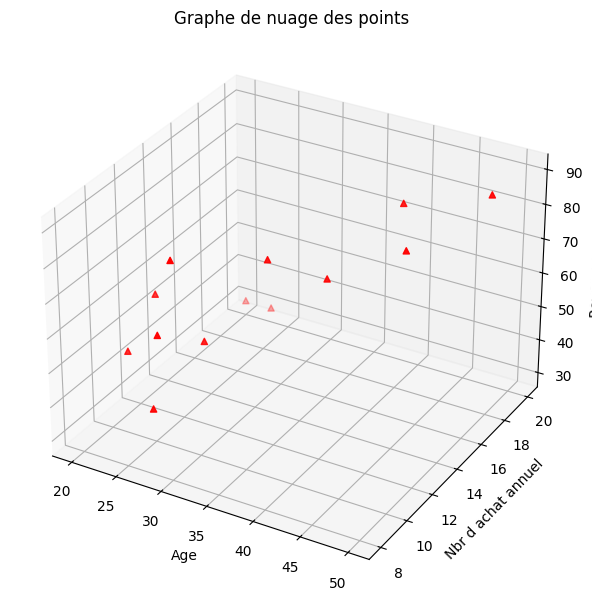

In [22]:
#code ici
grp = mb.figure(figsize=(16, 10))

ax = grp.add_subplot(121, projection='3d')

ax.scatter(clt["Âge"], clt["Nombre_d_achats_annuels"], clt["Revenu_annuel (en milliers de dollars)"], c='r', marker='^')

ax.set_xlabel('Age')
ax.set_ylabel('Nbr d achat annuel')
ax.set_zlabel('Revenu annuel')

mb.title('Graphe de nuage des points')

mb.show()









# Étape 4 : Ajustement du modèle de régression linéaire

In [23]:
#code ici
scale = StandardScaler()
X_scaled = scale.fit_transform(X[["Âge", "Nombre_d_achats_annuels"]])

X = sm.add_constant(X_scaled)
model = sm.OLS(Y, X).fit()
model.summary()





c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     Revenu_annuel (en milliers de dollars)   R-squared:                       0.738
Model:                                                OLS   Adj. R-squared:                  0.685
Method:                                     Least Squares   F-statistic:                     14.06
Date:                                    Mon, 07 Oct 2024   Prob (F-statistic):            0.00124
Time:                                            20:53:28   Log-Likelihood:                -48.071
No. Observations:                                      13   AIC:                             102.1
Df Residuals:                                          10   BIC:                             103.8
Df Model:                                               2                                         
Covariance Type:                                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4615      3.088     20.227      0.000      55.581      69.342
x1            16.8352      3.194      5.270      0.000       9.718      23.953
x2            -6.1117      3.194     -1.913      0.085     -13.229       1.006
==============================================================================
Omnibus:                        0.566   Durbin-Watson:                   2.420
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.011
Skew:                           0.072   Prob(JB):                        0.994
Kurtosis:                       2.994   Cond. No.                         1.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Étape 5 : Affichage du nuage de points avec la droite de régression.

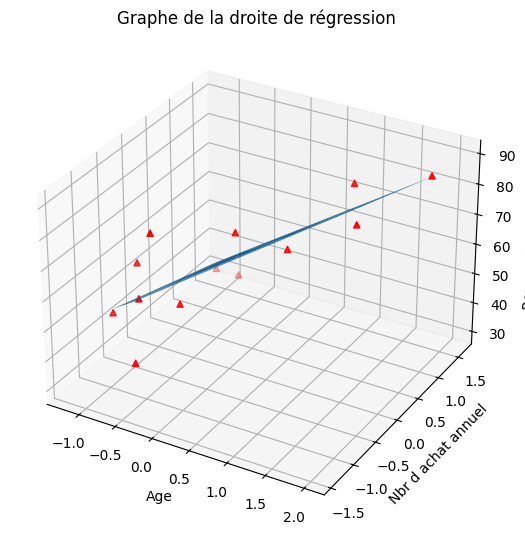

In [24]:
#code ici



# Effectuez les prédictions
Y_predict = model.predict(X)

# Créez une figure avec une taille personalisée
grp = mb.figure(figsize=(14, 9))

# Ajoute un sous-graphique 3D
ax = grp.add_subplot(1, 2, 1, projection="3d")
                      
# Nuage de points avec Les données réelles 
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], clt["Revenu_annuel (en milliers de dollars)"], c='r', marker='^')

# Ajoutez des étiquettes aux axes ax. set.
ax.set_xlabel ('Age')
ax.set_ylabel('Nbr d achat annuel')
ax.set_zlabel('Revenue annuel en $')

mb.title('Graphe de la droite de régression')


# Tracé de la surface triangulée avec Les prédictions 
ax.plot_trisurf(X_scaled[:, 0], X_scaled[:, 1], Y_predict)

# Affichez la figure
mb.show()







# Étape 6 : Tests de régression

In [25]:
#code ici
# Test de Durbin-Watson


# Calculez la statistique Durbin-Watson (DW)
dw = sm.stats.stattools.durbin_watson(model.resid)

print(f"Statistique Durbin-Watson (DW) : {dw:.2f}")






Statistique Durbin-Watson (DW) : 2.42


In [26]:
# Test de White pour l'hétéroscédasticité

from statsmodels.stats.diagnostic import het_white


# Effectuer le test de white
white_test_statistic, white_test_P_value, fstat, f_P_value = het_white(model.resid, X)


print(f"Statistique de White -- statistique du test : {white_test_statistic: 4f}")
print(f"Statistique de White -- valeur p : {white_test_P_value: 4f}")

if white_test_P_value < 0.05:
     print("hétéroscédasticité détéctée : : la variance des résidus n'est pas constante")
else:
     print("Aucune hétéroscédasticité significative détéctée")




Statistique de White -- statistique du test :  5.017720
Statistique de White -- valeur p :  0.413721
Aucune hétéroscédasticité significative détéctée


# Étape 7 : Résumé du modèle

In [31]:
#code ici
import statsmodels.api as sm
from sklearn.model_selection import train_test_split



# Ajout d'une constante (intercept) pour le modèle
X = sm.add_constant(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Création du modèle de régression linéaire avec statsmodels
model = sm.OLS(Y_train, X_train)

# Ajustement du modèle
results = model.fit()

# Affichage du résumé du modèle
print(results.summary())




                                      OLS Regression Results                                      
Dep. Variable:     Revenu_annuel (en milliers de dollars)   R-squared:                       0.654
Model:                                                OLS   Adj. R-squared:                  0.539
Method:                                     Least Squares   F-statistic:                     5.683
Date:                                    Mon, 07 Oct 2024   Prob (F-statistic):             0.0412
Time:                                            20:55:00   Log-Likelihood:                -31.123
No. Observations:                                       9   AIC:                             68.25
Df Residuals:                                           6   BIC:                             68.84
Df Model:                                               2                                         
Covariance Type:                                nonrobust                                         
          

c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


# Étape 8 : Calcul de l'Erreur quadratique moyenne (MSE).

In [32]:
#code ici

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Définition des variables indépendantes et dépendantes
Y = clt["Revenu_annuel (en milliers de dollars)"]
X = clt[["Âge", "Nombre_d_achats_annuels"]]

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_predict = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = metrics.mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error (MSE):', mse)




Mean Squared Error (MSE): 536.5455184151192


# Étape 9 : Coefficient de détermination (R²).

In [33]:
#code ici

import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Génération d'un jeu de données d'exemple
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 échantillons, 2 variables indépendantes
Y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)  # Génération de Y avec du bruit

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_predict = model.predict(X_test)

# Calcul du coefficient de détermination (R²)
r_squared = metrics.r2_score(Y_test, Y_predict)
print('Coefficient de détermination (R²):', r_squared)








Coefficient de détermination (R²): 0.4893562188406163
